In [37]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [39]:
len(words)

32033

In [40]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [103]:
block_size = 3
X, Y = [], []
for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [42]:
C = torch.randn((27, 2))

In [43]:
C

tensor([[ 0.3166,  1.4881],
        [ 0.3342, -0.7213],
        [ 0.5119, -1.6245],
        [ 1.1222, -0.9244],
        [-0.5668, -0.6874],
        [-1.2363, -1.2614],
        [ 1.9893,  0.1944],
        [ 0.0760,  0.4414],
        [ 1.2940, -0.6099],
        [ 0.9328,  0.4419],
        [-0.5913,  0.2510],
        [-0.1418,  2.1073],
        [-0.3046,  1.2381],
        [ 0.7701, -0.5294],
        [-2.1088,  2.2189],
        [-0.7774, -0.3956],
        [-1.9772,  0.8509],
        [-0.2177, -0.4089],
        [ 0.8186,  0.3216],
        [-1.5991, -2.6346],
        [ 1.2076,  1.3587],
        [-2.0215,  1.1020],
        [ 0.1091, -0.2370],
        [ 0.7105, -1.1920],
        [-0.9291, -0.1237],
        [-0.6724,  0.3984],
        [ 0.4478,  0.6288]])

In [44]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-1.2363, -1.2614])

In [45]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [46]:
C[X]

tensor([[[ 0.3166,  1.4881],
         [ 0.3166,  1.4881],
         [ 0.3166,  1.4881]],

        [[ 0.3166,  1.4881],
         [ 0.3166,  1.4881],
         [-1.2363, -1.2614]],

        [[ 0.3166,  1.4881],
         [-1.2363, -1.2614],
         [ 0.7701, -0.5294]],

        [[-1.2363, -1.2614],
         [ 0.7701, -0.5294],
         [ 0.7701, -0.5294]],

        [[ 0.7701, -0.5294],
         [ 0.7701, -0.5294],
         [ 0.3342, -0.7213]],

        [[ 0.3166,  1.4881],
         [ 0.3166,  1.4881],
         [ 0.3166,  1.4881]],

        [[ 0.3166,  1.4881],
         [ 0.3166,  1.4881],
         [-0.7774, -0.3956]],

        [[ 0.3166,  1.4881],
         [-0.7774, -0.3956],
         [-0.3046,  1.2381]],

        [[-0.7774, -0.3956],
         [-0.3046,  1.2381],
         [ 0.9328,  0.4419]],

        [[-0.3046,  1.2381],
         [ 0.9328,  0.4419],
         [ 0.1091, -0.2370]],

        [[ 0.9328,  0.4419],
         [ 0.1091, -0.2370],
         [ 0.9328,  0.4419]],

        [[ 0.1091, -0

In [47]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [48]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [49]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1)

tensor([[ 0.3166,  1.4881,  0.3166,  1.4881,  0.3166,  1.4881],
        [ 0.3166,  1.4881,  0.3166,  1.4881, -1.2363, -1.2614],
        [ 0.3166,  1.4881, -1.2363, -1.2614,  0.7701, -0.5294],
        [-1.2363, -1.2614,  0.7701, -0.5294,  0.7701, -0.5294],
        [ 0.7701, -0.5294,  0.7701, -0.5294,  0.3342, -0.7213],
        [ 0.3166,  1.4881,  0.3166,  1.4881,  0.3166,  1.4881],
        [ 0.3166,  1.4881,  0.3166,  1.4881, -0.7774, -0.3956],
        [ 0.3166,  1.4881, -0.7774, -0.3956, -0.3046,  1.2381],
        [-0.7774, -0.3956, -0.3046,  1.2381,  0.9328,  0.4419],
        [-0.3046,  1.2381,  0.9328,  0.4419,  0.1091, -0.2370],
        [ 0.9328,  0.4419,  0.1091, -0.2370,  0.9328,  0.4419],
        [ 0.1091, -0.2370,  0.9328,  0.4419,  0.3342, -0.7213],
        [ 0.3166,  1.4881,  0.3166,  1.4881,  0.3166,  1.4881],
        [ 0.3166,  1.4881,  0.3166,  1.4881,  0.3342, -0.7213],
        [ 0.3166,  1.4881,  0.3342, -0.7213,  0.1091, -0.2370],
        [ 0.3342, -0.7213,  0.1091, -0.2

In [50]:
torch.cat(torch.unbind(emb, 1), 1)

tensor([[ 0.3166,  1.4881,  0.3166,  1.4881,  0.3166,  1.4881],
        [ 0.3166,  1.4881,  0.3166,  1.4881, -1.2363, -1.2614],
        [ 0.3166,  1.4881, -1.2363, -1.2614,  0.7701, -0.5294],
        [-1.2363, -1.2614,  0.7701, -0.5294,  0.7701, -0.5294],
        [ 0.7701, -0.5294,  0.7701, -0.5294,  0.3342, -0.7213],
        [ 0.3166,  1.4881,  0.3166,  1.4881,  0.3166,  1.4881],
        [ 0.3166,  1.4881,  0.3166,  1.4881, -0.7774, -0.3956],
        [ 0.3166,  1.4881, -0.7774, -0.3956, -0.3046,  1.2381],
        [-0.7774, -0.3956, -0.3046,  1.2381,  0.9328,  0.4419],
        [-0.3046,  1.2381,  0.9328,  0.4419,  0.1091, -0.2370],
        [ 0.9328,  0.4419,  0.1091, -0.2370,  0.9328,  0.4419],
        [ 0.1091, -0.2370,  0.9328,  0.4419,  0.3342, -0.7213],
        [ 0.3166,  1.4881,  0.3166,  1.4881,  0.3166,  1.4881],
        [ 0.3166,  1.4881,  0.3166,  1.4881,  0.3342, -0.7213],
        [ 0.3166,  1.4881,  0.3342, -0.7213,  0.1091, -0.2370],
        [ 0.3342, -0.7213,  0.1091, -0.2

In [51]:
a = torch.arange(18)

In [52]:
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [53]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [54]:
emb.view(32, 6)

tensor([[ 0.3166,  1.4881,  0.3166,  1.4881,  0.3166,  1.4881],
        [ 0.3166,  1.4881,  0.3166,  1.4881, -1.2363, -1.2614],
        [ 0.3166,  1.4881, -1.2363, -1.2614,  0.7701, -0.5294],
        [-1.2363, -1.2614,  0.7701, -0.5294,  0.7701, -0.5294],
        [ 0.7701, -0.5294,  0.7701, -0.5294,  0.3342, -0.7213],
        [ 0.3166,  1.4881,  0.3166,  1.4881,  0.3166,  1.4881],
        [ 0.3166,  1.4881,  0.3166,  1.4881, -0.7774, -0.3956],
        [ 0.3166,  1.4881, -0.7774, -0.3956, -0.3046,  1.2381],
        [-0.7774, -0.3956, -0.3046,  1.2381,  0.9328,  0.4419],
        [-0.3046,  1.2381,  0.9328,  0.4419,  0.1091, -0.2370],
        [ 0.9328,  0.4419,  0.1091, -0.2370,  0.9328,  0.4419],
        [ 0.1091, -0.2370,  0.9328,  0.4419,  0.3342, -0.7213],
        [ 0.3166,  1.4881,  0.3166,  1.4881,  0.3166,  1.4881],
        [ 0.3166,  1.4881,  0.3166,  1.4881,  0.3342, -0.7213],
        [ 0.3166,  1.4881,  0.3342, -0.7213,  0.1091, -0.2370],
        [ 0.3342, -0.7213,  0.1091, -0.2

In [55]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [56]:
h

tensor([[ 0.9871, -0.9328,  0.9595,  ..., -0.9999, -0.9829, -0.9999],
        [-0.9966,  0.9787, -0.8060,  ..., -0.9996, -0.9403, -0.9992],
        [ 0.8613,  0.2521, -0.3760,  ...,  0.8594,  0.6461, -0.7111],
        ...,
        [ 0.9906,  0.9734,  0.0944,  ...,  0.5248, -0.9975, -0.3430],
        [ 1.0000,  0.0130,  0.9971,  ..., -0.9980, -0.9999,  0.5767],
        [-0.9999, -0.9639, -0.9936,  ..., -0.5278, -0.9557, -0.9547]])

In [57]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)
logits = h @ W2 + b2

In [58]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)

In [59]:
prob.shape

torch.Size([32, 27])

In [60]:
-prob[torch.arange(32), Y].log().mean()

tensor(17.3588)

In [182]:
C = torch.randn((27, 10))
W1 = torch.randn((50, 300))
b1 = torch.randn(300)
W2 = torch.randn((300, 27))
b2 = torch.randn(27)
parameters = [C, W1, W2, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

In [96]:
# forward pass
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
# counts = logits.exp()
# prob = counts / counts.sum(1, keepdims=True)
# loss = -prob[torch.arange(32), Y].log().mean()
# loss

In [97]:
loss = F.cross_entropy(logits, Y)

In [98]:
# F.cross_entropy is smart and prevents overflow

In [99]:
# backward pass
for p in parameters:
    p.grad = None
loss.backward()
for p in parameters:
    p.data += -0.1 * p.grad
print(loss)

tensor(6.2113, grad_fn=<NllLossBackward0>)


In [127]:
for _ in range(50):
    emb = C[Xtr]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr)
    print(loss.item())
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -0.1 * p.grad

15.040214538574219
13.618721961975098
12.475126266479492
11.489274978637695
10.589452743530273
9.795488357543945
9.112970352172852
8.556276321411133
8.121389389038086
7.797356128692627
7.527536392211914
7.28743314743042
7.066788673400879
6.861387252807617
6.668956756591797
6.488128185272217
6.317955017089844
6.157670974731445
6.0065436363220215
5.863872051239014
5.729036808013916
5.601583003997803
5.481241703033447
5.36790657043457
5.261539936065674
5.162067890167236
5.069309234619141
4.98295783996582
4.9026055335998535
4.827787399291992
4.758012771606445
4.692796230316162
4.631675720214844
4.574225902557373
4.5200605392456055
4.468838214874268
4.420258045196533
4.374059677124023
4.330015659332275
4.287932395935059
4.247640132904053
4.208990573883057
4.171858787536621
4.136129379272461
4.101705551147461
4.068499565124512
4.036433696746826
4.005438804626465
3.975454568862915
3.9464242458343506


In [183]:
def build_dataset(words):
    block_size = 5
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182355, 5]) torch.Size([182355])
torch.Size([22972, 5]) torch.Size([22972])
torch.Size([22819, 5]) torch.Size([22819])


In [189]:
lossi = []
stepi = []
for i in range(int(100*1000)):
    # construct minibatch
    ix = torch.randint(0, Xtr.shape[0], (128,))
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 50) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    for p in parameters:
        p.grad = None
    loss.backward()
    stepi.append(i)
    lossi.append(loss.log10().item())
    for p in parameters:
        if i < 50*1000:
            lr = 0.1
        else:
            lr = 0.01
        p.data += -lr * p.grad

In [190]:
loss

tensor(1.8508, grad_fn=<NllLossBackward0>)

In [191]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 50) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.0733, grad_fn=<NllLossBackward0>)

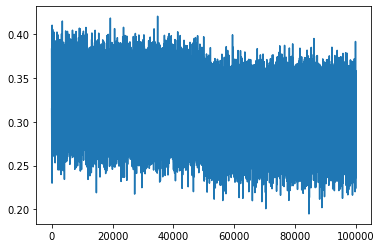

In [192]:
plt.plot(stepi, lossi)

In [193]:
emb = C[Xte]
h = torch.tanh(emb.view(-1, 50) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Yte)
loss

tensor(2.0665, grad_fn=<NllLossBackward0>)

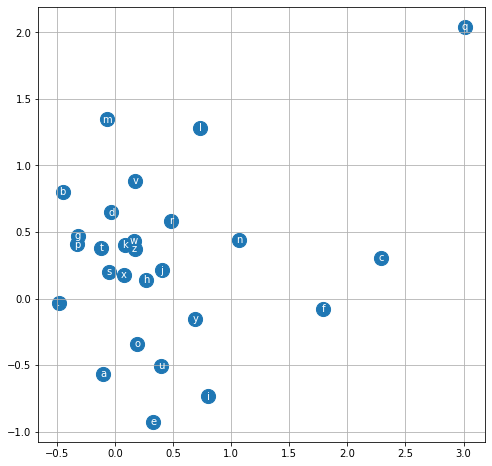

In [170]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')         

In [196]:
for _ in range(20):
    out = []
    context = [0] * 5
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

ahnas.
henevy.
rhyo.
juni.
jemyra.
brexlyn.
brael.
miciez.
anjia.
jaycei.
modyean.
azad.
mabib.
peadan.
ayair.
josmontsin.
atmer.
rollyn.
xou.
ston.
